In [2]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 9.0 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.1 MB/s eta 0:00:00ta 0:00:01


In [4]:
!pip install seaborn

In [5]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
def visualize_next_token_predictions(text, model_name="distilgpt2", top_k=10):
    
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)
    print(model.transformer.wte)
    
    
    inputs = tokenizer(text, return_tensors="pt")
    
    
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
    
    
    next_token_logits = logits[0, -1, :]
    probabilities = torch.nn.functional.softmax(next_token_logits, dim=0)
    
    
    top_k_probs, top_k_indices = torch.topk(probabilities, top_k)
    
    
    top_k_tokens = [tokenizer.decode([idx.item()]) for idx in top_k_indices]
    
    
    plt.figure(figsize=(12, 6))
    
    
    bars = plt.barh(range(top_k), top_k_probs.numpy())
    
    
    plt.yticks(range(top_k), top_k_tokens)
    plt.xlabel('Probability')
    plt.title(f'Top {top_k} Next Token Predictions\nInput: "{text}"')
    
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}',
                ha='left', va='center', fontweight='bold')
    
    
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, 
                              norm=plt.Normalize(vmin=min(top_k_probs), 
                                               vmax=max(top_k_probs)))
    for bar, prob in zip(bars, top_k_probs):
        bar.set_color(sm.to_rgba(prob))
    
    plt.tight_layout()
    plt.show()


In [7]:
def demonstrate_predictions():
    examples = [
        "The cat sat on the",
        "I love to eat",
        "The weather today is",
        "Once upon a"
    ]
    
    for example in examples:
        print(f"\nAnalyzing: '{example}'")
        visualize_next_token_predictions(example)
        input("Press Enter to continue to next example...")



Analyzing: 'The cat sat on the'


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

2024-10-25 17:25:05.608260: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Embedding(50257, 768)


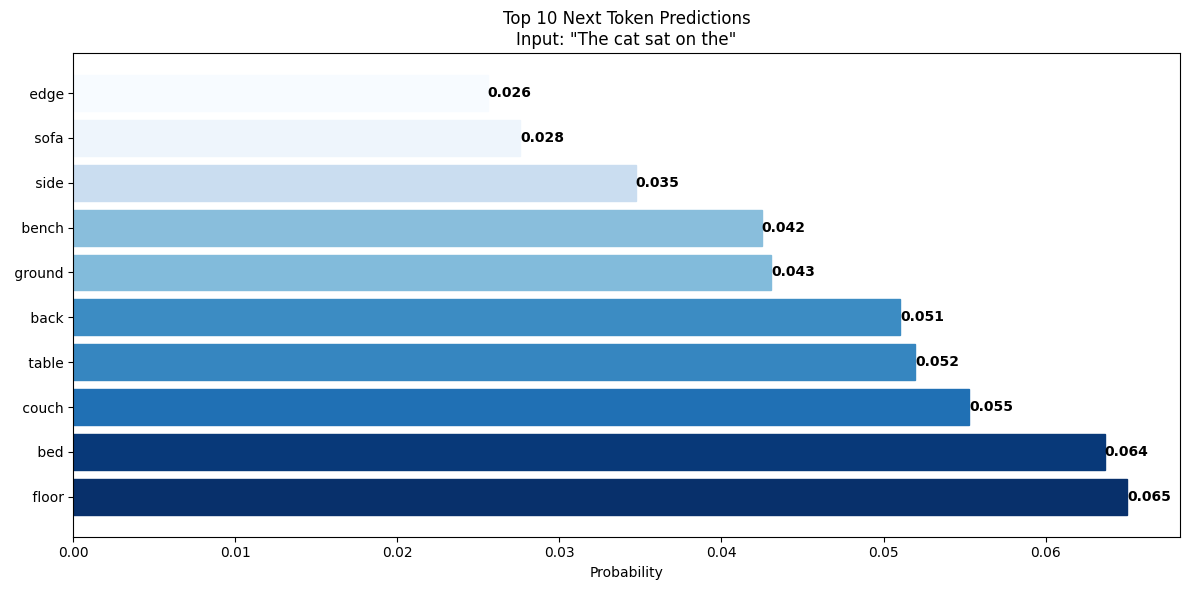

Press Enter to continue to next example... 



Analyzing: 'I love to eat'
Embedding(50257, 768)


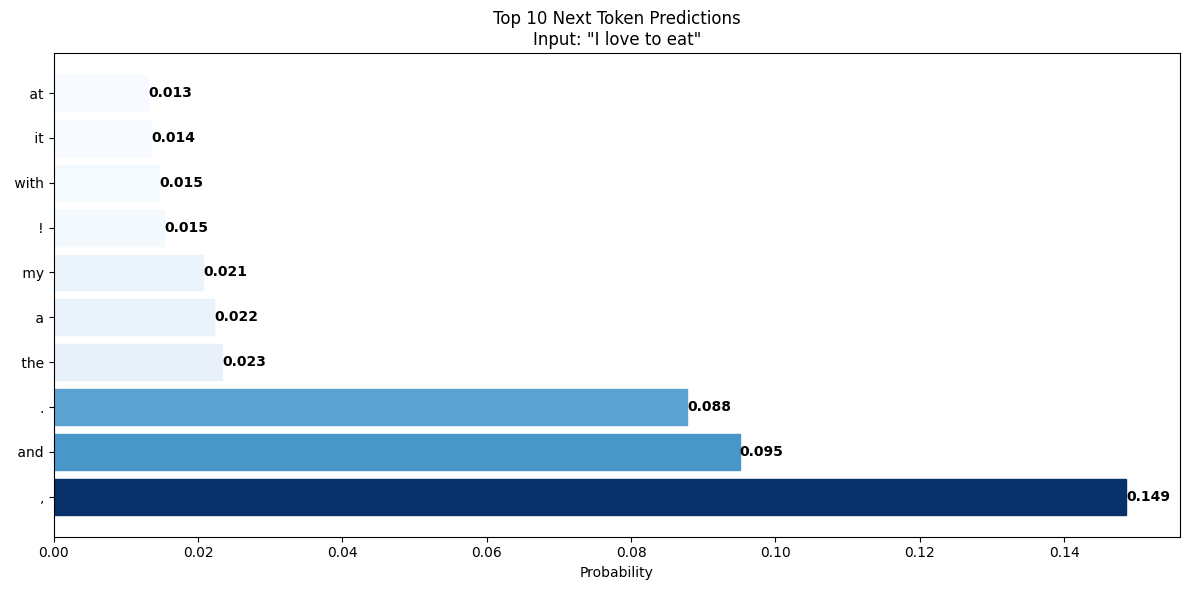

Press Enter to continue to next example... 



Analyzing: 'The weather today is'
Embedding(50257, 768)


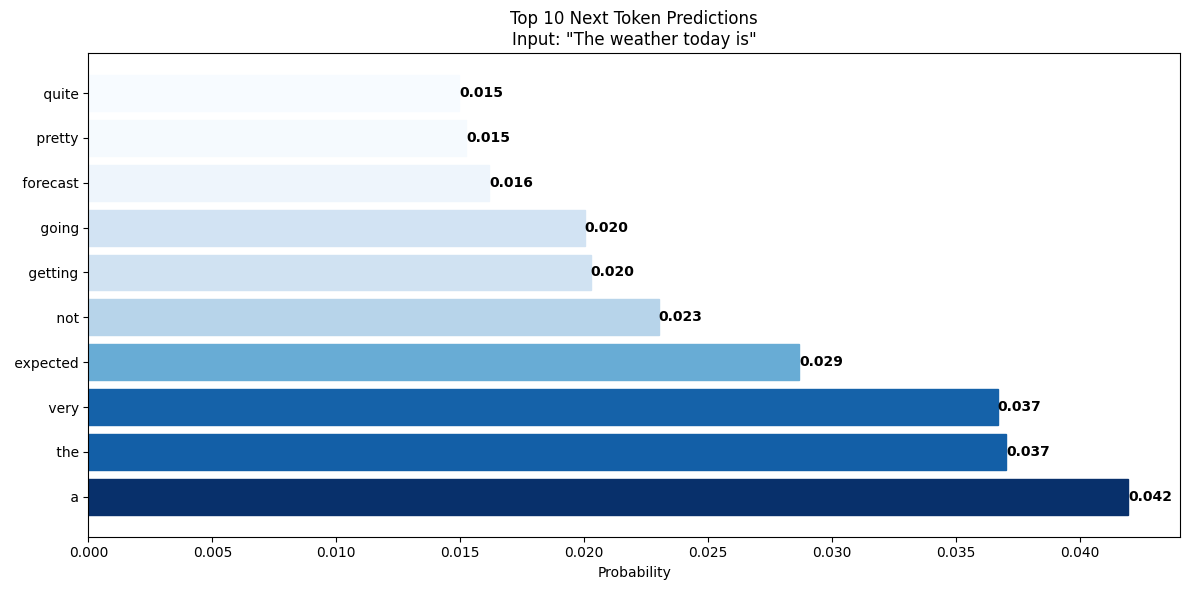

Press Enter to continue to next example... 



Analyzing: 'Once upon a'
Embedding(50257, 768)


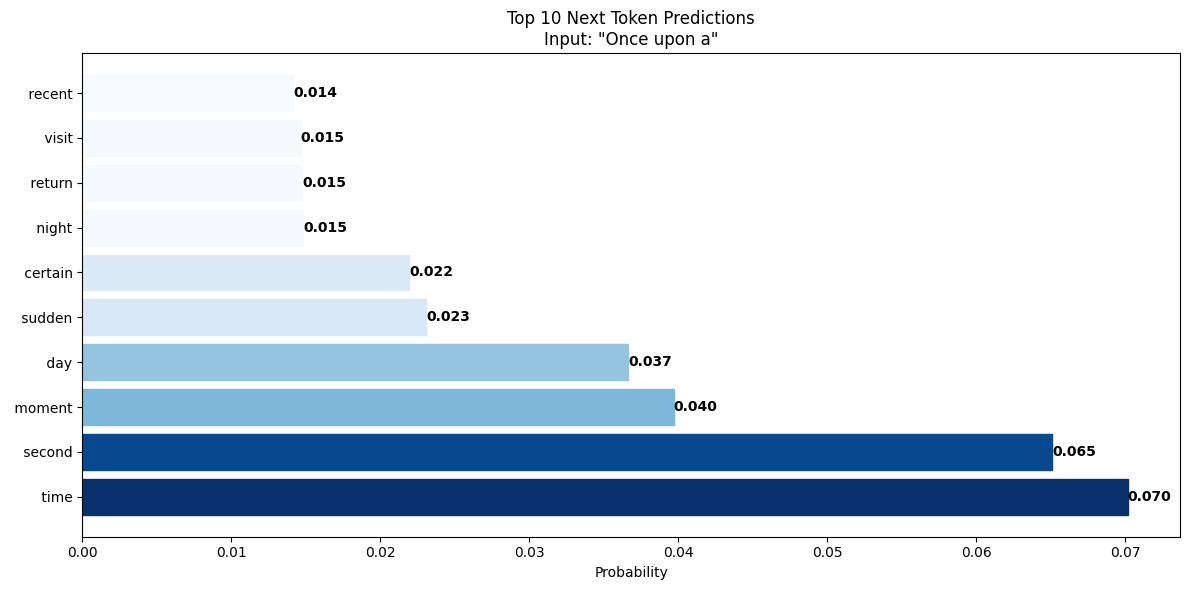

Press Enter to continue to next example... 


In [8]:
 demonstrate_predictions()